<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/ExpoGas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombres: Solis Procopio Uriel, Barrera Bahena Cesia Sunem

In [ ]:
!pip install simpy
import itertools
import random

import simpy


SEMILLA_ALEATORIA = 42
TAMAÑO_ESTACION = 200          # litros
UMBRAL = 10                    # Umbral para llamar al camión cisterna (en %)
TAMAÑO_TANQUE_COMBUSTIBLE = 50 # litros
NIVEL_TANQUE_COMBUSTIBLE = [5, 25] # Niveles mínimo/máximo del tanque de combustible (en litros)
VELOCIDAD_REPOSTAJE = 2        # litros / segundo
TIEMPO_CAMION_CISTERNA = 300   # Tiempo que tarda el camión cisterna en llegar (en segundos)
T_INTER = [30, 300]            # Crear un auto cada [min, max] segundos
TIEMPO_SIMULACION = 1000       # Tiempo total de simulación en segundos


def auto(nombre, env, estacion_gasolina, bomba_combustible):
    """Un auto llega a la estación de gasolina para repostar.

    Solicita una de las bombas de combustible de la estación y trata de obtener
    la cantidad deseada de combustible de ella. Si el depósito de la estación se
    agota, el auto debe esperar a que llegue el camión cisterna.

    """
    nivel_tanque_combustible = random.randint(*NIVEL_TANQUE_COMBUSTIBLE)
    print('%s llegando a la estación de gasolina a las %.1f' % (nombre, env.now))
    with estacion_gasolina.request() as req:
        inicio = env.now
        # Solicitar una de las bombas de combustible
        yield req

        # Obtener la cantidad requerida de combustible
        litros_requeridos = TAMAÑO_TANQUE_COMBUSTIBLE - nivel_tanque_combustible
        yield bomba_combustible.get(litros_requeridos)

        # El proceso de repostaje "real" lleva cierto tiempo
        yield env.timeout(litros_requeridos / VELOCIDAD_REPOSTAJE)

        print('%s terminó de repostar en %.1f segundos.' % (nombre, env.now - inicio))


def control_estacion_gasolina(env, bomba_combustible):
    """Comprobar periódicamente el nivel de la *bomba_combustible* y llamar al
    camión cisterna si el nivel cae por debajo de un umbral."""
    while True:
        if bomba_combustible.level / bomba_combustible.capacity * 100 < UMBRAL:
            # ¡Necesitamos llamar al camión cisterna ahora!
            print('Llamando al camión cisterna a las %d' % env.now)
            # Esperar a que llegue el camión cisterna y reabastezca la estación
            yield env.process(camion_cisterna(env, bomba_combustible))

        yield env.timeout(10)  # Comprobar cada 10 segundos


def camion_cisterna(env, bomba_combustible):
    """Llega a la estación de gasolina después de un cierto retraso y la reabastece."""
    yield env.timeout(TIEMPO_CAMION_CISTERNA)
    print('El camión cisterna llega en el tiempo %d' % env.now)
    cantidad = bomba_combustible.capacity - bomba_combustible.level
    print('El camión cisterna reabastece %.1f litros.' % cantidad)
    yield bomba_combustible.put(cantidad)


def generador_autos(env, estacion_gasolina, bomba_combustible):
    """Genera nuevos autos que llegan a la estación de gasolina."""
    for i in itertools.count():
        yield env.timeout(random.randint(*T_INTER))
        env.process(auto('Auto %d' % i, env, estacion_gasolina, bomba_combustible))


# Configuración e inicio de la simulación
print('Repostaje en la estación de gasolina')
random.seed(SEMILLA_ALEATORIA)

# Crear el entorno y comenzar los procesos
env = simpy.Environment()
estacion_gasolina = simpy.Resource(env, 2)
bomba_combustible = simpy.Container(env, TAMAÑO_ESTACION, init=TAMAÑO_ESTACION)
env.process(control_estacion_gasolina(env, bomba_combustible))
env.process(generador_autos(env, estacion_gasolina, bomba_combustible))

# ¡A ejecutar!
env.run(until=TIEMPO_SIMULACION)

Repostaje en la estación de gasolina
Auto 0 llegando a la estación de gasolina a las 87.0
Auto 0 terminó de repostar en 18.5 segundos.
Auto 1 llegando a la estación de gasolina a las 129.0
Auto 1 terminó de repostar en 19.0 segundos.
Auto 2 llegando a la estación de gasolina a las 284.0
Auto 2 terminó de repostar en 21.0 segundos.
Auto 3 llegando a la estación de gasolina a las 385.0
Auto 3 terminó de repostar en 13.5 segundos.
Auto 4 llegando a la estación de gasolina a las 459.0
Llamando al camión cisterna a las 460
Auto 4 terminó de repostar en 22.0 segundos.
Auto 5 llegando a la estación de gasolina a las 705.0
Auto 6 llegando a la estación de gasolina a las 750.0
El camión cisterna llega en el tiempo 760
El camión cisterna reabastece 188.0 litros.
Auto 6 terminó de repostar en 29.0 segundos.
Auto 5 terminó de repostar en 76.5 segundos.
Auto 7 llegando a la estación de gasolina a las 891.0
Auto 7 terminó de repostar en 13.0 segundos.


Auto 0 llegando a la estación de gasolina a las 2.1
Auto 1 llegando a la estación de gasolina a las 18.3
Auto 0 terminó de repostar en 21.0 segundos.
Auto 2 llegando a la estación de gasolina a las 24.6
Auto 3 llegando a la estación de gasolina a las 39.1
Auto 1 terminó de repostar en 22.5 segundos.
Auto 2 terminó de repostar en 18.5 segundos.
Auto 4 llegando a la estación de gasolina a las 49.9
Llamando al camión cisterna a las 50
Auto 5 llegando a la estación de gasolina a las 58.8
Auto 3 terminó de repostar en 20.7 segundos.
Auto 6 llegando a la estación de gasolina a las 61.6
Auto 4 terminó de repostar en 19.0 segundos.
Auto 7 llegando a la estación de gasolina a las 78.8
Auto 8 llegando a la estación de gasolina a las 91.9
Auto 9 llegando a la estación de gasolina a las 111.2
Auto 10 llegando a la estación de gasolina a las 121.1
Auto 11 llegando a la estación de gasolina a las 122.9
Auto 12 llegando a la estación de gasolina a las 140.0
Auto 13 llegando a la estación de gasolina 

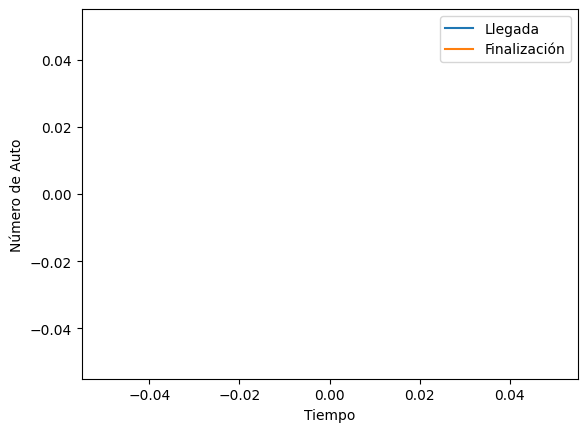

In [ ]:
import matplotlib.pyplot as plt
import simpy
import itertools
import random
import numpy as np

SEMILLA_ALEATORIA = 42
TAMAÑO_ESTACION = 200
UMBRAL = 10
TAMAÑO_TANQUE_COMBUSTIBLE = 50
NIVEL_TANQUE_COMBUSTIBLE = [5, 25]
VELOCIDAD_REPOSTAJE = 2
TIEMPO_CAMION_CISTERNA = 300
LAMBDA = 0.1  # Parámetro lambda para el proceso de Poisson
TIEMPO_SIMULACION = 1000

tiempos_llegada = []
tiempos_finalizacion = []

def generar_tiempo_inter(arrival_rate):
    """Genera un tiempo inter-llegada siguiendo una distribución exponencial."""
    return np.random.exponential(1/arrival_rate)

def auto(nombre, env, estacion_gasolina, bomba_combustible):
    nivel_tanque_combustible = random.randint(*NIVEL_TANQUE_COMBUSTIBLE)
    print('%s llegando a la estación de gasolina a las %.1f' % (nombre, env.now))
    with estacion_gasolina.request() as req:
        inicio = env.now
        yield req
        litros_requeridos = TAMAÑO_TANQUE_COMBUSTIBLE - nivel_tanque_combustible
        yield bomba_combustible.get(litros_requeridos)
        yield env.timeout(litros_requeridos / VELOCIDAD_REPOSTAJE)
        print('%s terminó de repostar en %.1f segundos.' % (nombre, env.now - inicio))

def control_estacion_gasolina(env, bomba_combustible):
    while True:
        if bomba_combustible.level / bomba_combustible.capacity * 100 < UMBRAL:
            print('Llamando al camión cisterna a las %d' % env.now)
            yield env.process(camion_cisterna(env, bomba_combustible))
        yield env.timeout(10)

def camion_cisterna(env, bomba_combustible):
    yield env.timeout(TIEMPO_CAMION_CISTERNA)
    print('El camión cisterna llega en el tiempo %d' % env.now)
    cantidad = bomba_combustible.capacity - bomba_combustible.level
    print('El camión cisterna reabastece %.1f litros.' % cantidad)
    yield bomba_combustible.put(cantidad)

def generador_autos(env, estacion_gasolina, bomba_combustible):
    for i in itertools.count():
        yield env.timeout(generar_tiempo_inter(LAMBDA))
        env.process(auto('Auto %d' % i, env, estacion_gasolina, bomba_combustible))

def registrar_llegada(env, auto_name):
    yield env.timeout(0)
    tiempos_llegada.append(env.now)

def registrar_finalizacion(env, auto_name):
    yield env.timeout(0)
    tiempos_finalizacion.append(env.now)

env = simpy.Environment()
estacion_gasolina = simpy.Resource(env, 2)
bomba_combustible = simpy.Container(env, TAMAÑO_ESTACION, init=TAMAÑO_ESTACION)
env.process(control_estacion_gasolina(env, bomba_combustible))
env.process(generador_autos(env, estacion_gasolina, bomba_combustible))

env.run(until=TIEMPO_SIMULACION)

plt.step(tiempos_llegada, range(len(tiempos_llegada)), where='post', label='Llegada')
plt.step(tiempos_finalizacion, range(len(tiempos_finalizacion)), where='post', label='Finalización')
plt.xlabel('Tiempo')
plt.ylabel('Número de Auto')
plt.legend()
plt.show()

In [ ]:
!pip install simpy
import simpy
import random

def auto(nombre, env, bomba_combustible):
    """Un auto llega a la estación de gasolina para repostar."""
    nivel_tanque_combustible = random.randint(*NIVEL_TANQUE_COMBUSTIBLE)
    print('%s llegando a la estación de gasolina a las %.1f' % (nombre, env.now))
    with bomba_combustible.request() as req:
        inicio = env.now
        # Solicitar la bomba de combustible
        yield req

        # Obtener la cantidad requerida de combustible
        litros_requeridos = TAMAÑO_TANQUE_COMBUSTIBLE - nivel_tanque_combustible
        yield bomba_combustible.get(litros_requeridos)

        # El proceso de repostaje "real" lleva cierto tiempo
        yield env.timeout(litros_requeridos / VELOCIDAD_REPOSTAJE)

        print('%s terminó de repostar en %.1f segundos.' % (nombre, env.now - inicio))


# Configuración e inicio de la simulación
print('Repostaje en la estación de gasolina')
random.seed(SEMILLA_ALEATORIA)

# Crear el entorno y comenzar los procesos
env = simpy.Environment()
bomba_combustible = simpy.Resource(env, capacity=1)
env.process(auto('Auto 1', env, bomba_combustible))

# ¡A ejecutar!
env.run(until=TIEMPO_SIMULACION)

Repostaje en la estación de gasolina
Auto 1 llegando a la estación de gasolina a las 0.0


TypeError: ignored